<h1> Week 6 - Davis Southern Club Women</h1>

<i><h3>Joby John</h3></i>

<h3>Davis Southern Club Women</h3>

These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

We wil use <b><i>davis_southern_women_graph</i></b> function in networkx to load the graph. 

In [1]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plot
import matplotlib.colors as colors
import pandas as pd
import math

In [2]:

g = nx.davis_southern_women_graph()

women = g.graph['top']
events = g.graph['bottom']
nodes = g.number_of_nodes()
edges = g.number_of_edges()
top_nodes, bottom_nodes = nx.bipartite.sets(g)
print(nx.info(g))


Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


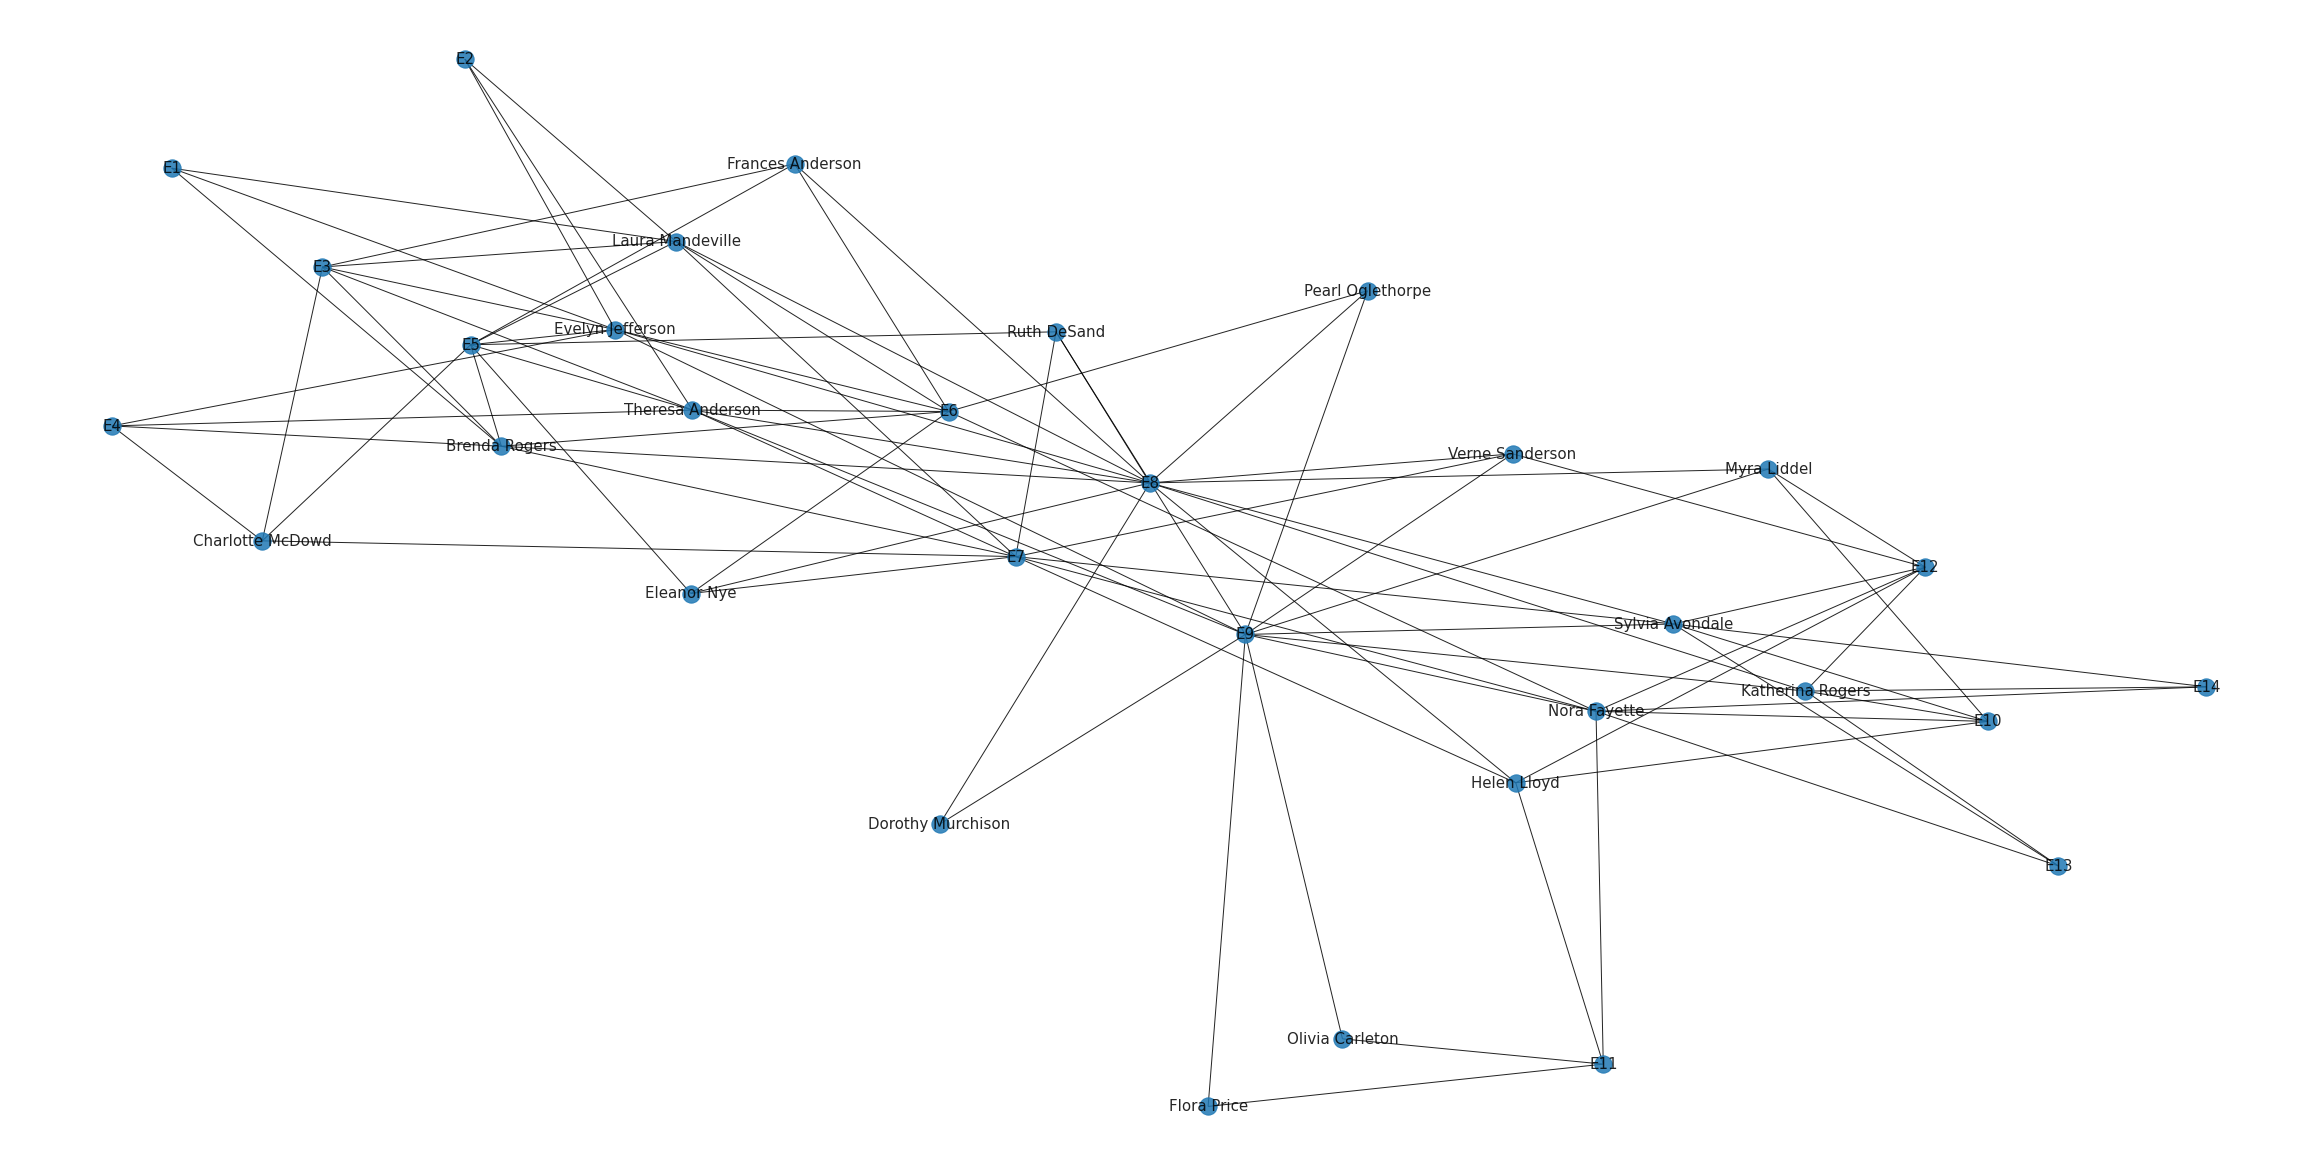

In [3]:
plot.rcParams['figure.figsize'] = (32, 16)
nx.draw(g,with_labels=True, alpha=.85, font_size=15)

Adjacency Matrix

In [4]:
print(bipartite.biadjacency_matrix(g, women, events))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


 <h3>Pair who attends events together</h3>
 We see from the table below Evelyn Jefferson and Theresa Anderson attends most events

In [5]:

l=bipartite.weighted_projected_graph(g,women)
df = nx.to_pandas_edgelist(l)
(df.sort_values(by='weight',ascending=False)) 


,source,target,weight
13,Evelyn Jefferson,Theresa Anderson,7
33,Theresa Anderson,Brenda Rogers,6
7,Evelyn Jefferson,Laura Mandeville,6
126,Sylvia Avondale,Nora Fayette,6
119,Katherina Rogers,Sylvia Avondale,6
19,Laura Mandeville,Brenda Rogers,6
27,Laura Mandeville,Theresa Anderson,6
2,Evelyn Jefferson,Brenda Rogers,6
121,Katherina Rogers,Nora Fayette,5
26,Laura Mandeville,Frances Anderson,4


<h3>Closeness centrality<h3>

Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes.
Higher values of closeness indicate higher centrality.
Below table display Closeness centrality

In [6]:

clos_cen = nx.closeness_centrality(l)
df_close = pd.DataFrame.from_dict(clos_cen,orient='index',columns=['weight'])
(df_close.sort_values(by='weight',ascending=False))

,weight
Evelyn Jefferson,1.000000
Ruth DeSand,1.000000
Helen Lloyd,1.000000
Nora Fayette,1.000000
Sylvia Avondale,1.000000
Verne Sanderson,1.000000
Theresa Anderson,1.000000
Pearl Oglethorpe,0.944444
Myra Liddel,0.944444
Katherina Rogers,0.944444


<h3>Eigen centrality Measure </h3>

Eigen centrality is a measure of the influence of a node in a network.
Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

Below table displays the Eigen centrality. People with higher value are the most influentinal. 

In [7]:

eig_cen = nx.eigenvector_centrality(l)
df_eig = pd.DataFrame.from_dict(eig_cen,orient='index',columns=['weight'])
print(df_eig.sort_values(by='weight',ascending=False))

                     weight
Evelyn Jefferson   0.253524
Theresa Anderson   0.253524
Ruth DeSand        0.253524
Helen Lloyd        0.253524
Nora Fayette       0.253524
Sylvia Avondale    0.253524
Verne Sanderson    0.253524
Pearl Oglethorpe   0.243157
Myra Liddel        0.243157
Katherina Rogers   0.243157
Dorothy Murchison  0.243157
Eleanor Nye        0.230973
Laura Mandeville   0.230973
Frances Anderson   0.230973
Brenda Rogers      0.230973
Olivia Carleton    0.187639
Flora Price        0.187639
Charlotte McDowd   0.172527


<h3>Related Events</h3>

Below table displays events that are related. 

In [8]:
c=bipartite.weighted_projected_graph(g,events)
df = nx.to_pandas_edgelist(c)
(df.sort_values(by='weight',ascending=False))

,source,target,weight
46,E8,E9,9
39,E7,E8,8
26,E5,E8,7
31,E6,E8,7
29,E5,E7,6
28,E5,E6,6
17,E3,E5,6
37,E6,E7,5
40,E7,E9,5
18,E3,E6,5


<h3>Closeness Measure</h3>

Table below displays how efficently events spread inforation through the events graph

In [9]:
clos_cen = nx.closeness_centrality(c)
df_close = pd.DataFrame.from_dict(clos_cen,orient='index',columns=['weight'])
(df_close.sort_values(by='weight',ascending=False))

,weight
E6,1.000000
E7,1.000000
E8,1.000000
E9,1.000000
E1,0.722222
E2,0.722222
E3,0.722222
E4,0.722222
E5,0.722222
E10,0.722222


<h3>Closeness Measure - Influential Event</h3>
Table below displays event's influence

In [10]:
 
eig_cen = nx.eigenvector_centrality(c)
df_eig = pd.DataFrame.from_dict(eig_cen,orient='index',columns=['weight'])
(df_eig.sort_values(by='weight',ascending=False))


,weight
E6,0.339336
E7,0.339336
E8,0.339336
E9,0.339336
E10,0.232251
E11,0.232251
E12,0.232251
E13,0.232251
E14,0.232251
E1,0.232251


<h3>Below table displays the number of events attended by each woman</h3>

In [11]:
 
w = g.degree(top_nodes)
sorted(zip(dict(w).values(), dict(w).keys()), reverse=True)

[(8, 'Theresa Anderson'),
 (8, 'Nora Fayette'),
 (8, 'Evelyn Jefferson'),
 (7, 'Sylvia Avondale'),
 (7, 'Laura Mandeville'),
 (7, 'Brenda Rogers'),
 (6, 'Katherina Rogers'),
 (5, 'Helen Lloyd'),
 (4, 'Verne Sanderson'),
 (4, 'Ruth DeSand'),
 (4, 'Myra Liddel'),
 (4, 'Frances Anderson'),
 (4, 'Eleanor Nye'),
 (4, 'Charlotte McDowd'),
 (3, 'Pearl Oglethorpe'),
 (2, 'Olivia Carleton'),
 (2, 'Flora Price'),
 (2, 'Dorothy Murchison')]

<h3>Below table displays the number of women attended the event</h3> 

In [12]:

e = g.degree(bottom_nodes)
sorted(zip(dict(e).values(), dict(e).keys()), reverse=True)
 

[(14, 'E8'),
 (12, 'E9'),
 (10, 'E7'),
 (8, 'E6'),
 (8, 'E5'),
 (6, 'E3'),
 (6, 'E12'),
 (5, 'E10'),
 (4, 'E4'),
 (4, 'E11'),
 (3, 'E2'),
 (3, 'E14'),
 (3, 'E13'),
 (3, 'E1')]

<h3>Conclusion</h3>

<ul>                                                     
    <li>Theresa, Nora and Evelyn attended most events together</li>
    <li>Events 8,9, and 7 are the Most popular events and attended by most women</li>
    <li>Evelyn, Theresa and Nora are the most social and Influential people</li>
</ul>